In [ ]:
import numpy as np
import pydot
import graphviz
from tensorflow.keras.applications.efficientnet import EfficientNetB0
from tensorflow.keras.preprocessing import image
from tensorflow.keras.utils import plot_model
from tensorflow.keras.models import Model
from tensorflow.keras.layers import AveragePooling2D, GlobalAveragePooling2D, Dense, Input
from tensorflow.keras.layers import Embedding, LSTM, Add
from tensorflow.keras.losses import SparseCategoricalCrossentropy

In [1]:
!pip install pydot

In [2]:
!pip install graphviz

# Get the X_train, y_train

In [2]:
import pickle
import numpy as np

## Load data for X1

### Import features file

In [73]:
features_file = '../output/extracted_features/extract_features_6k.pkl'

In [74]:
file = open(features_file, 'rb')
features_dict = pickle.load(file)
file.close()

In [75]:
len(features_dict['2513260012_03d33305cf'][0])

256

## Create the X1_train

### Import captions data

In [119]:
captions_file = '../output/extracted_features/cap'

In [120]:
file = open(captions_file, 'rb')
x2_captions = pickle.load(file)
file.close()

In [121]:
cap_img_list = x2_captions[0] # first column with list of repeated image id's
cap_img_list[0]

'1000268201_693b08cb0e'

### Create X1_train

In [122]:
X1_train = []
for cap_img in cap_img_list:
    img_feature_matrix = features_dict[cap_img][0]
    X1_train.append(img_feature_matrix)
X1_train = np.array(X1_train)[:10000]
X1_train.shape

(10000, 256)

## Create X2_train

In [123]:
X2_train = np.array(x2_captions[1]).astype(np.uint32)[:10000]
X2_train.shape

(10000, 33)

In [124]:
x2_captions[2][13]

[696]

In [125]:
X2_train[14]

array([   1,   33,    2,   69,  122,    4,  123,   55,  477,   11,  676,
          2,   25, 6611,  696,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0],
      dtype=uint32)

## Create y_train

In [126]:
y_train = np.array([el[0] if len(el)>0 else vocab_size+1 for el in x2_captions[2][:10000]])
y_train

array([ 33,   2,  69, ..., 503,  24, 182])

In [127]:
x2_captions=None
del x2_captions

#  LSTM sequence model

## LSTM Model layers

In [128]:
max_caption_length = 32+1
vocab_size = 8763+2

In [129]:

inputs2  = Input(shape=(max_caption_length,),name="captions")
embed_layer = Embedding(vocab_size, 256, mask_zero=True)(inputs2)

inputs1 = Input(shape=(256,),name="images")
combine = Add()([embed_layer,inputs1])


In [130]:
lstm_layer = LSTM(256)(combine)
decoder = Dense(1000, activation='relu')(lstm_layer)
outputs = Dense(vocab_size+2, activation='softmax')(decoder)

##### Model summary Model summary

In [131]:

model = Model(inputs=[inputs1, inputs2], outputs=outputs)
model.compile(loss='categorical_crossentropy' , optimizer='adam',
             metrics = 'accuracy')

In [132]:
model.summary()

Model: "model_5"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 captions (InputLayer)          [(None, 33)]         0           []                               
                                                                                                  
 embedding_5 (Embedding)        (None, 33, 256)      2243840     ['captions[0][0]']               
                                                                                                  
 images (InputLayer)            [(None, 256)]        0           []                               
                                                                                                  
 add_5 (Add)                    (None, 33, 256)      0           ['embedding_5[0][0]',            
                                                                  'images[0][0]']           

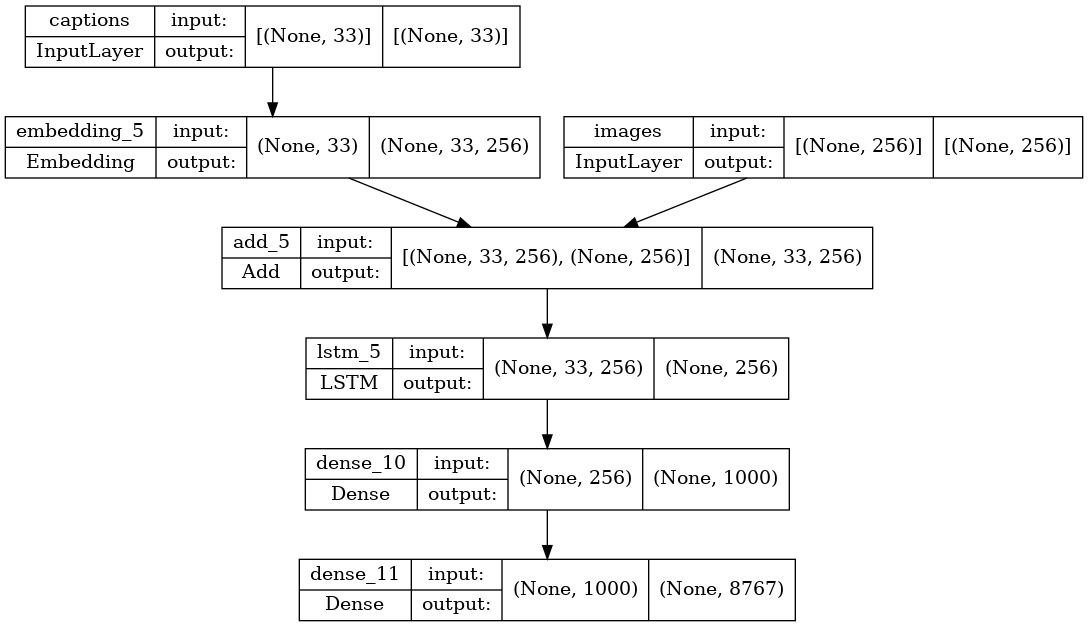

In [133]:
plot_model(model,show_shapes=True)

# Fit and train model 

In [135]:
import tensorflow as tf

In [136]:
y_train = tf.keras.utils.to_categorical(y_train, num_classes=8765+2)

In [137]:
y_train.shape

(10000, 8767)

In [ ]:
# The fit
model.fit(
x=(X1_train,X2_train),
    y=y_train,
    batch_size=32,
    epochs=10, 
    verbose=1
)

# Predict the results

In [ ]:
# The prediction (one per sequence/city)
model.predict(X)

In [142]:
img_encoded.shape

(256,)

In [143]:
inputs_seq.shape

(1,)

In [163]:
pad_sequences([inputs_seq],padding='post',maxlen=33).shape

(1, 33)

In [167]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
inputs_seq='startsequence'
img_encoded=X1_train[0:1]
inputs_seq = [2]
# seq = 
for i in range(33):
    inputs_seq_model = pad_sequences([inputs_seq],padding='post',maxlen=33)
    y_pre = model.predict([img_encoded,inputs_seq_model])
    next_word = y_pre.argmax()
    if next_word == 8766:
        break
    inputs_seq.append(next_word)

In [168]:
inputs_seq

[2, 10, 46, 18, 42, 29, 243, 4954]

In [158]:
inputs_seq.shape

(1, 33)

In [155]:
y_pre.argmax()

23